In [11]:
import seaborn as sns
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np 

In [22]:
irrigation_machine = pd.read_csv('./../../Data/irrigation_machine.csv')
sensor_readings = irrigation_machine.drop(['parcel_0', 'parcel_1','parcel_2'], axis=1)
sensor_readings = sensor_readings.drop(sensor_readings.columns[0], axis=1)
y = irrigation_machine[['parcel_0', 'parcel_1','parcel_2']]
# Normalize sensor readings
scaler = StandardScaler()
sensor_readings = scaler.fit_transform(sensor_readings)
sensors_train,sensors_test, parcels_train, parcels_test = train_test_split(sensor_readings,y,test_size=0.2, random_state=42)

In [24]:
model = Sequential()

model.add(Dense(64, input_shape=(sensor_readings.shape[1],), activation='relu'))

model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()

c:\Users\Shadow\anaconda3\envs\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,539 (6.01 KB)

 Trainable params: 1,539 (6.01 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4253 - loss: 0.6294 - val_accuracy: 0.5688 - val_loss: 0.4961
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5946 - loss: 0.4680 - val_accuracy: 0.5969 - val_loss: 0.4152
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6136 - loss: 0.4049 - val_accuracy: 0.6000 - val_loss: 0.3693
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6360 - loss: 0.3633 - val_accuracy: 0.5938 - val_loss: 0.3383
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6533 - loss: 0.3288 - val_accuracy: 0.6000 - val_loss: 0.3149
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6377 - loss: 0.3042 - val_accuracy: 0.5906 - val_loss: 0.2979
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6579 - loss: 0.2914 - val_accuracy: 0.6031 - val_loss: 0.2838
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6617 - loss: 0.2689 - val_accuracy: 0.6062 - v

Implementing callbacks

In [26]:
# import seaborn as sns
# import pandas as pd
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import numpy as np 


irrigation_machine = pd.read_csv('./../../Data/irrigation_machine.csv')
sensor_readings = irrigation_machine.drop(['parcel_0', 'parcel_1','parcel_2'], axis=1)
sensor_readings = sensor_readings.drop(sensor_readings.columns[0], axis=1)
y = irrigation_machine[['parcel_0', 'parcel_1','parcel_2']]
# Normalize sensor readings
scaler = StandardScaler()
sensor_readings = scaler.fit_transform(sensor_readings)
sensors_train,sensors_test, parcels_train, parcels_test = train_test_split(sensor_readings,y,test_size=0.2, random_state=42)

model = Sequential()

model.add(Dense(64, input_shape=(sensor_readings.shape[1],), activation='relu'))

model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()

c:\Users\Shadow\anaconda3\envs\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,539 (6.01 KB)

 Trainable params: 1,539 (6.01 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
import matplotlib.pyplot as plt
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()


def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4566 - loss: 0.6601 - val_accuracy: 0.6225 - val_loss: 0.5033
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6177 - loss: 0.4725 - val_accuracy: 0.6475 - val_loss: 0.3983
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6662 - loss: 0.3833 - val_accuracy: 0.6375 - val_loss: 0.3396
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6505 - loss: 0.3459 - val_accuracy: 0.6300 - val_loss: 0.3034
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6359 - loss: 0.3036 - val_accuracy: 0.6250 - val_loss: 0.2762
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6486 - loss: 0.2926 - val_accuracy: 0.6225 - val_loss: 0.2616
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6421 - loss: 0.2601 - val_accuracy: 0.6200 - val_loss: 0.2498
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6357 - loss: 0.2555 - val_accuracy: 0.6275 - val_loss:

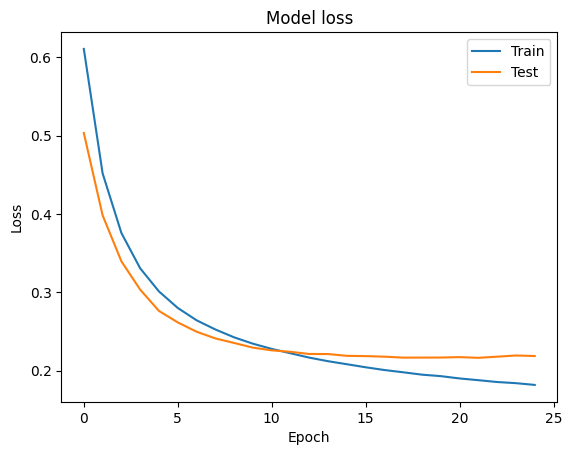

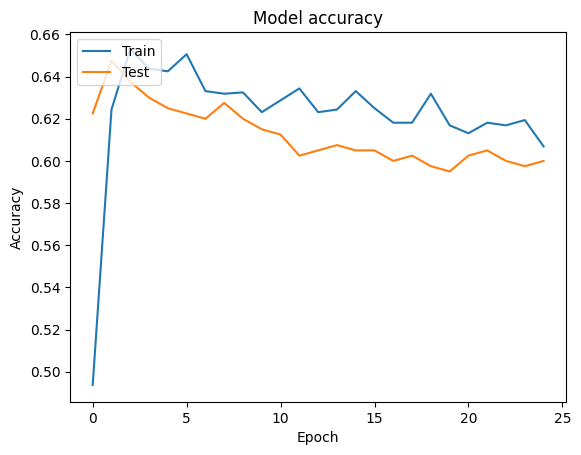

In [28]:


# Train for 100 epochs using a validation split of 0.2
h_callback=model.fit(sensors_train, parcels_train, epochs = 25, validation_data=(sensors_test,parcels_test))


# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])
